## linear regression model

1. Residuals vs Fitted: Look for randomness; no pattern -> good linearity & homoscedasticity
2. Histogram & QQ: Check normality assumption
3. Residuals vs Predictor: No trend -> linearity assumption holds
4. R2 & RMSE: Quantify model fit; interpret usefulness accordingly

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from scipy import stats as st
np.random.seed(123)

R2: 0.492
RMSE: 0.008


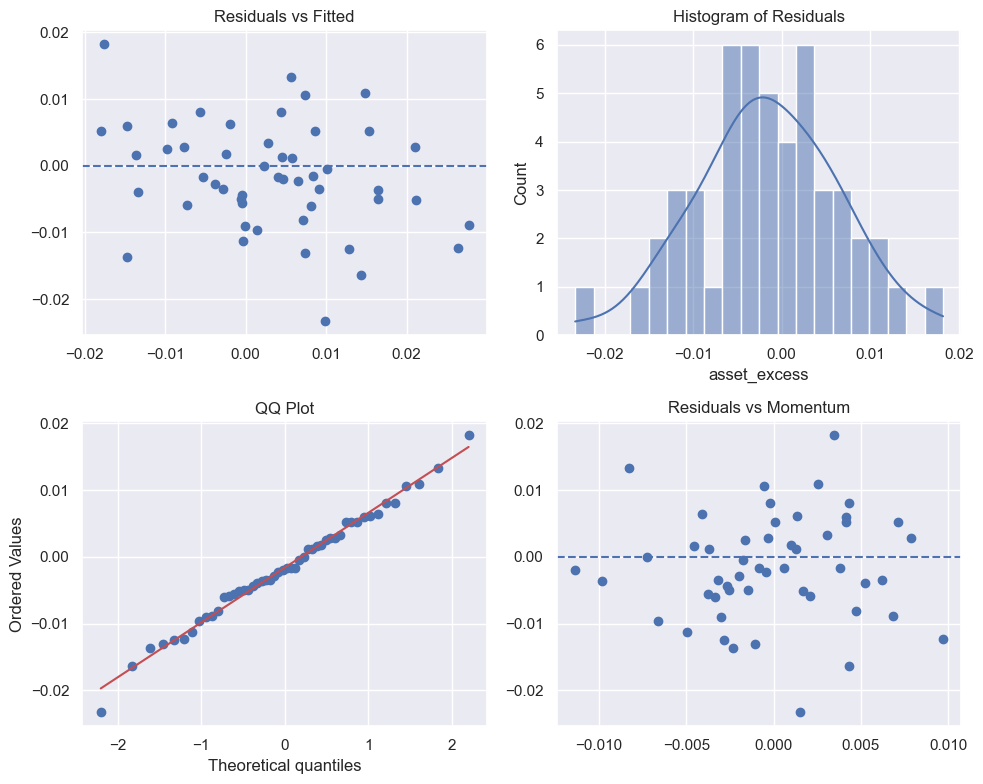

In [9]:
# Simulate factor return dataset with some differences / create data
n = 250  # changed sample size
dates = pd.bdate_range(start='2024-01-02', periods=n)

# Simulate factors with slightly different volatilities
mkt_excess = np.random.normal(0, 0.012, size=n)
size = np.random.normal(0, 0.007, size=n)
value = np.random.normal(0, 0.009, size=n)
momentum = np.random.normal(0, 0.005, size=n)

# True coefficients - tweak values slightly
beta0 = 0.0005
beta_mkt = 0.9
beta_size = 0.25
beta_value = -0.15
beta_mom = 0.5
beta_mom2 = 3.5  # different quadratic effect

# Heteroscedastic noise: scale increases with |size| instead of |mkt_excess|
noise_scale = 0.005 + 0.5 * np.abs(size)
eps = np.random.normal(0, noise_scale)

# Simulate asset excess returns with small interaction term
asset_excess = (
    beta0 + beta_mkt * mkt_excess + beta_size * size + beta_value * value + beta_mom * momentum
    + beta_mom2 * (momentum ** 2) + 0.1 * mkt_excess * value + eps
)

# Create DataFrame
df = pd.DataFrame({
    'date': dates,
    'mkt_excess': mkt_excess,
    'size': size,
    'value': value,
    'momentum': momentum,
    'asset_excess': asset_excess
})


# Train/Test Split 
X = df[['mkt_excess','size','value','momentum']]
y = df['asset_excess']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Fit Linear Regression 
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Residuals & R^2, RMSE
resid = y_test - y_pred
fitted = y_pred
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)   # works everywhere
print(f"R2: {r2:.3f}")
print(f"RMSE: {rmse:.3f}")

# Residual Diagnostics --- visual setup
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Residuals vs Fitted
axes[0, 0].scatter(fitted, resid)
axes[0, 0].axhline(0, linestyle='--')
axes[0, 0].set_title('Residuals vs Fitted')

# Histogram
sns.histplot(resid, bins=20, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Histogram of Residuals')

# QQ Plot
st.probplot(resid, dist='norm', plot=axes[1, 0])
axes[1, 0].set_title('QQ Plot')

# Residuals vs Momentum
axes[1, 1].scatter(X_test['momentum'], resid)
axes[1, 1].axhline(0, linestyle='--')
axes[1, 1].set_title('Residuals vs Momentum')

plt.tight_layout()
plt.show()